# CROQUIS
### 1. Analizar los datos del dataset, plantear correlacion entre variables, dependencias, causalidades y patrones, entre otras. Emplear graficos de distintos tipos para lograr insights.
### 2. Seleccionar un subconjunto del total del analisis de relaciones o patrones que parecen presentar mayor peso al momento de categorizar y dividir/diferenciar el conjunto de personas en grupos bien definidos.
### 3. A partir de los resultados relevantes, elaborar hipotesis/conjeturas sobre el comportamiento a futuro (en este caso, si van a ver o no Frozen 4).
### 4. Elaborar un programa LOGICO basico en Python (baseline) que permita discriminar aquellos usuarios que, a partir de ciertas caracteristicas en comun, sean considerados como candidatos a ver Frozen 4.

# FEATURES 
- **volvera**: (variable target) entero que representa 0: no volvería, 1: si volvería
- **tipo_de_sala**: El tipo de la sala (2d, 3d, 4d) [2d: sala común, 3d: sala 3D, 4d: sala 4D]
- **genero**: género con el cual el usuario se identifica en la encuesta
- **edad**: edad del usuario que completa la encuesta
- **amigos**: cantidad de amigos con los que fue a ver la película (Frozen 3)
- **parientes**: cantidad de familiares con los que fue a ver la película (Frozen 3)
- **ticket**: código del ticket
- **precio**: precio pagado por el ticket, en franjas de valor ordenadas de 1 a 50
- **fila**: fila dentro de la sala
- **cine**: nombre del cine [FiuMark tiene varias sedes]
- **nombre**: nombre del usuario que completa la encuesta

# FECHAS CLAVES
- **Entrega del notebook**: Miércoles 28 de octubre.
- **Defensa oral del tp**: Martes 3 de noviembre.

# SECTION 1

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### GENERAL OVERVIEW

In [37]:
train_df_values = pd.read_csv('Data/tp-2020-2c-train-cols1.csv')

In [38]:
train_df_values.head()

,Unnamed: 0,id_usuario,volveria
0,116,117,0
1,657,658,0
2,793,794,0
3,454,455,0
4,172,173,1


In [39]:
train_df_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  801 non-null    int64
 1   id_usuario  801 non-null    int64
 2   volveria    801 non-null    int64
dtypes: int64(3)
memory usage: 18.9 KB


In [40]:
train_df_values.describe()

,Unnamed: 0,id_usuario,volveria
count,801.000000,801.000000,801.000000
mean,448.701623,449.701623,0.383271
std,257.192277,257.192277,0.486487
min,0.000000,1.000000,0.000000
25%,228.000000,229.000000,0.000000
50%,451.000000,452.000000,0.000000
75%,672.000000,673.000000,1.000000
max,890.000000,891.000000,1.000000


In [41]:
train_df_values.isnull().values.any()

False

In [82]:
train_df_features = pd.read_csv('Data/tp-2020-2c-train-cols2.csv')

In [83]:
train_df_features.head()

,Unnamed: 0,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
0,116,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes
1,657,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes
2,793,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita
3,454,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo
4,172,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo


In [84]:
train_df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     801 non-null    int64  
 1   tipo_de_sala   801 non-null    object 
 2   nombre         801 non-null    object 
 3   id_usuario     801 non-null    int64  
 4   genero         801 non-null    object 
 5   edad           641 non-null    float64
 6   amigos         801 non-null    int64  
 7   parientes      801 non-null    int64  
 8   id_ticket      801 non-null    object 
 9   precio_ticket  801 non-null    int64  
 10  fila           177 non-null    object 
 11  nombre_sede    799 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 75.2+ KB


In [85]:
train_df_features.describe()

,Unnamed: 0,id_usuario,edad,amigos,parientes,precio_ticket
count,801.000000,801.000000,641.000000,801.000000,801.000000,801.000000
mean,448.701623,449.701623,32.688378,0.504370,0.383271,3.453184
std,257.192277,257.192277,14.380672,1.089859,0.804158,4.629592
min,0.000000,1.000000,3.420000,0.000000,0.000000,1.000000
25%,228.000000,229.000000,23.000000,0.000000,0.000000,1.000000
50%,451.000000,452.000000,31.000000,0.000000,0.000000,2.000000
75%,672.000000,673.000000,41.000000,1.000000,0.000000,3.000000
max,890.000000,891.000000,83.000000,8.000000,6.000000,50.000000


In [86]:
train_df_features.isnull().values.any()

True

### NaN value analysis

In [92]:
df_NaN_Values = train_df_features.drop('Unnamed: 0', axis = 1)
df_NaN_Values = df_NaN_Values.isnull().mean() * 100

In [93]:
df_NaN_Values

tipo_de_sala      0.000000
nombre            0.000000
id_usuario        0.000000
genero            0.000000
edad             19.975031
amigos            0.000000
parientes         0.000000
id_ticket         0.000000
precio_ticket     0.000000
fila             77.902622
nombre_sede       0.249688
dtype: float64

In [122]:
#df_NaN_Values.plot(kind = 'bar', figsize = [20,10], title = 'Data Set Missing values', fontsize = 15)

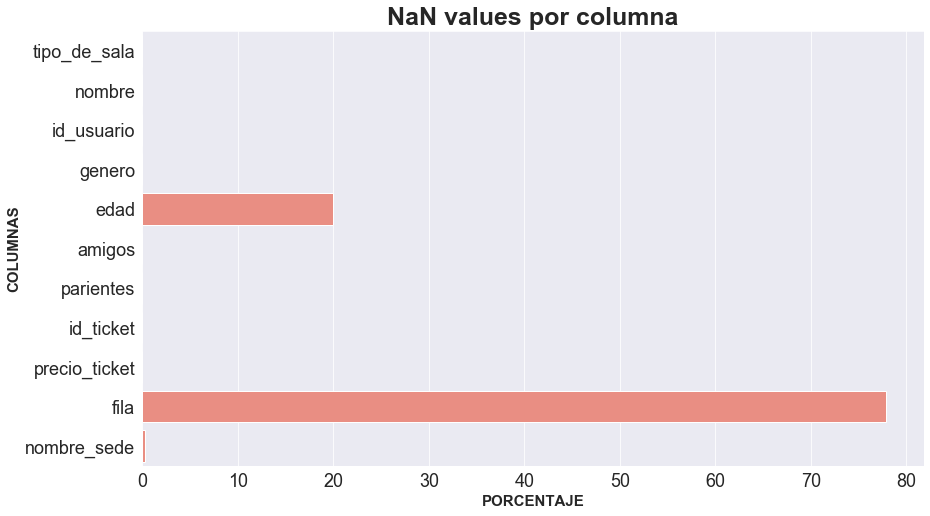

In [178]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_color_codes("pastel")
sns.set_style("darkgrid")
plt.title("NaN values por columna", fontweight = "bold", fontsize=25)
sns.barplot(x = df_NaN_Values, y = df_NaN_Values.index, color="salmon")
ax.set_xlabel('PORCENTAJE',fontsize=15, fontweight = "semibold");
ax.set_ylabel('COLUMNAS',fontsize=15, fontweight = "semibold");
ax.tick_params(labelsize=18)

Se puede apreciar que casi el 80% de los valores de la columna **fila** son nulos. Esto implica que cualquier informacion que se pueda obtener a partir de dicha columna no refleja la informacion que contiene el total del dataset. De modo que, cualquier conclusion a la que se arribara a partir de la columna FILA sera tomada con cautela.
En lo que respecta a la columna **edad**, si bien el porcentaje de datos nulos es considerable (alrededor de 20%), en relacion al total del set, podemos considerar que aquellas conclusiones que se obtienen a partir de la misma tendran relevancia al momento de generar *insight* sobre el total del dataset. Sin embargo, no se debe olvidar que lo que se puede concluir a partir de esta columna no refleja el total del dataset, sino un 80% del mismo.
Finalmente, el campo **nombre_sede** no contiene una cantidad significativa de valores nulos por lo que cualquier *insigth*  que se obtenga a partir de la misma seran considerados como de igual peso que aquellas columnas que no tienen valores nulos.

### Analisis de features y target

In [128]:
# Preparacion del df
train_df_features_aux = train_df_features.drop('Unnamed: 0', axis = 1)
train_df_values_aux = train_df_values.drop('Unnamed: 0', axis = 1)
df_features_target = pd.merge(train_df_features_aux,train_df_values_aux, on = 'id_usuario')
df_features_target

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes,0
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes,0
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita,0
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo,0
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo,1
...,...,...,...,...,...,...,...,...,...,...,...,...
796,normal,Señor Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo,1
797,3d,Señorita Lidia Catalina,636,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo,1
798,4d,Señor Arturo Antenor,848,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita,0
799,3d,Señorita Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,adelante,fiumark_quilmes,1


**SEGMENTO: COLUMNA GENERO**

In [157]:
df_genero_vs_target = pd.crosstab(df_features_target['genero'],df_features_target['volveria']).reset_index()
df_genero_vs_target['total'] = df_genero_vs_target [0] + df_genero_vs_target [1]
df_genero_vs_target

volveria,genero,0,1,total
0,hombre,419,94,513
1,mujer,75,213,288


In [158]:
# Convertimos valores a porcentajes
df_genero_vs_target ['no_percentage'] = (df_genero_vs_target [0])*100/(df_genero_vs_target['total'])
df_genero_vs_target ['yes_percentage'] = (df_genero_vs_target [1])*100/(df_genero_vs_target['total'])
df_genero_vs_target ['total_percentage']=100
del df_genero_vs_target[0]
del df_genero_vs_target[1]
del df_genero_vs_target['total']
df_genero_vs_target

volveria,genero,no_percentage,yes_percentage,total_percentage
0,hombre,81.676413,18.323587,100
1,mujer,26.041667,73.958333,100


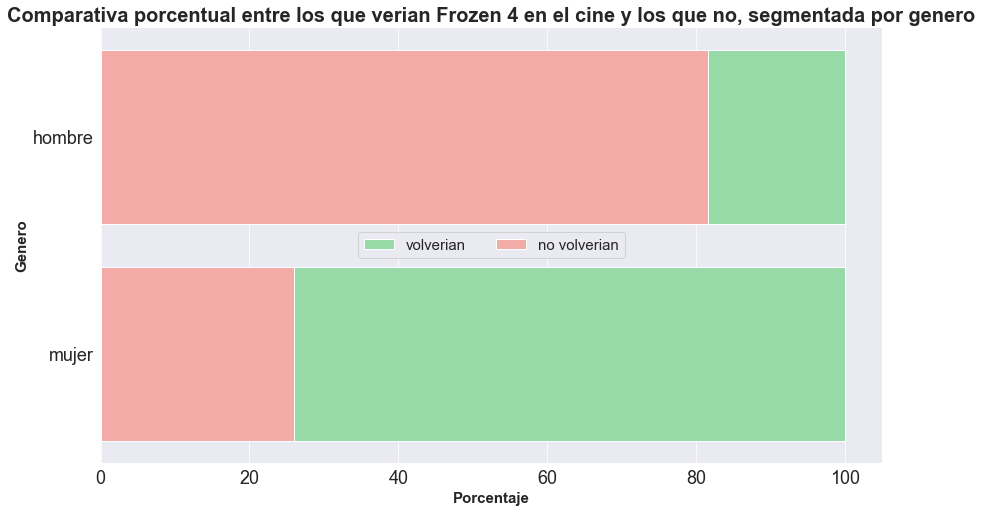

In [176]:
sns.set_style('darkgrid')
plt.figure(figsize = (14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = 'total_percentage', y = 'genero', data = df_genero_vs_target, color = 'g', label = 'volverian')
sns.barplot(x = 'no_percentage', y = 'genero', data = df_genero_vs_target, color = 'r', label = 'no volverian')
plt.tick_params(labelsize=18)

plt.legend(ncol=2, loc="center", frameon=True, fontsize = 15)

sns.despine(left = True, bottom = True)
plt.xlabel ('Porcentaje', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Genero', fontweight = 'semibold', fontsize = 15)
plt.title ('Comparativa porcentual entre los que verian Frozen 4 en el cine y los que no, segmentada por genero', fontweight = 'semibold', fontsize = 20)
plt.show()

La grafica revela que el porcentaje de mujeres que volverian a alguno de los cines de FiuMark supera ampliamente el porcentaje de los hombres, de modo que, de realizarse algun tipo de campana que promocione Forzen 4, debe considerarse que el publico femenino probablemente sea el mas receptivo.

Podemos analizar la misma informacion desde otro angulo: es este caso podriamos ver la proporcion de hombres vs la proporcion de muejeres que  volverian (o no) a alguno de los cines de FiuMark

In [254]:
df_genero_and_target = df_features_target.copy()
df_genero_and_target

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes,0
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes,0
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita,0
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo,0
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo,1
...,...,...,...,...,...,...,...,...,...,...,...,...
796,normal,Señor Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo,1
797,3d,Señorita Lidia Catalina,636,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo,1
798,4d,Señor Arturo Antenor,848,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita,0
799,3d,Señorita Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,adelante,fiumark_quilmes,1


In [262]:

df_genero_and_target = pd.crosstab(df_features_target['volveria'],df_features_target['genero']).reset_index()
#df_genero_and_target['total'] = df_genero_and_target ['hombre'] + df_genero_and_target ['mujer']
#df_genero_and_target['porcentaje_hombres'] = (df_genero_and_target ['hombre'])/(df_genero_and_target ['total'])*100
#df_genero_and_target['porcentaje_mujeres'] = (df_genero_and_target ['mujer'])/(df_genero_and_target ['total'])*100
#df_genero_and_target['porcentaje_total'] = 100
#del df_genero_and_target['hombre']
#del df_genero_and_target['mujer']
#del df_genero_and_target['total']

df_genero_and_target['volveria'] = df_genero_and_target['volveria'].map({0: 'no volveria', 1: 'volveria'})
df_genero_and_target = df_genero_and_target.set_index('volveria')
df_genero_and_target

genero,hombre,mujer
volveria,,
no volveria,419,75
volveria,94,213


In [263]:
df_genero_and_target_porcentual= df_genero_and_target.div(df_genero_and_target.sum(axis=1), axis=0)
df_genero_and_target_porcentual

genero,hombre,mujer
volveria,,
no volveria,0.848178,0.151822
volveria,0.306189,0.693811


In [295]:
df_genero_and_target_porcentual_no_volverian = df_genero_and_target_porcentual.iloc[0,:]
df_genero_and_target_porcentual_no_volverian
df_genero_and_target_porcentual_volverian = df_genero_and_target_porcentual.iloc[1,:]
df_genero_and_target_porcentual_volverian

genero
hombre    0.306189
mujer     0.693811
Name: volveria, dtype: float64

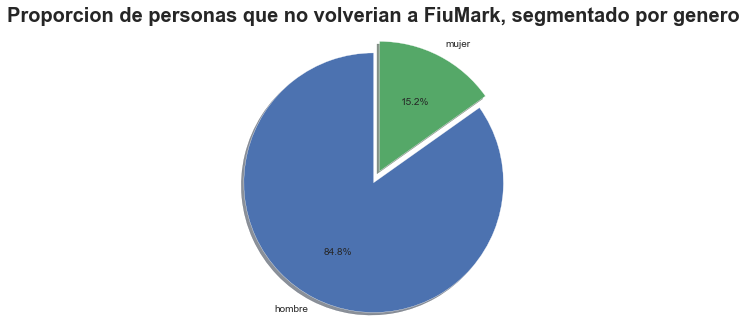

In [302]:
labels = 'hombre', 'mujer'
sizes = [df_genero_and_target_porcentual.iloc[0,0], df_genero_and_target_porcentual.iloc[0,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proporcion de personas que no volverian a FiuMark, segmentado por genero', fontweight = 'semibold', fontsize = 20)
plt.show()

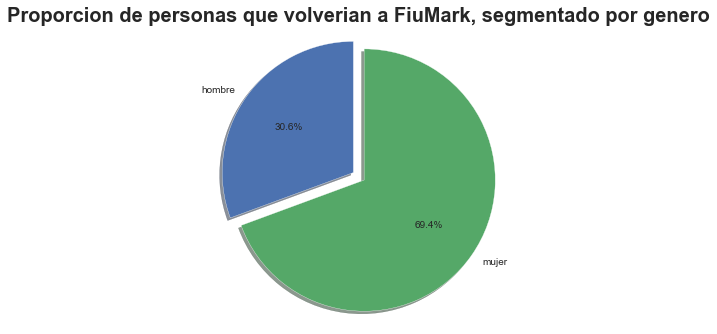

In [300]:
labels = 'hombre', 'mujer'
sizes = [df_genero_and_target_porcentual.iloc[1,0], df_genero_and_target_porcentual.iloc[1,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proporcion de personas que volverian a FiuMark, segmentado por genero', fontweight = 'semibold', fontsize = 20)
plt.show()

Como se puede observar, el mayor porcentaje de personas que volverian a un cine FiuMark a ver Frozen 4 corresponde a las mujeres. por otro lado, los hombres no tienen intencion de volver a uno de estos cines a ver Frozen 4. Una observacion interesante es que el criterio para decidir quienes no volverian es mas fuerte que el criterio para decidir quienes si volverian, pues la diferencia porcentual entre los generos es mayor en el primer caso.

**SEGMENTO: COLUMNA AMIGOS**

In [180]:
df_amigos_vs_target = pd.crosstab(df_features_target['amigos'],df_features_target['volveria']).reset_index()
#df_amigos_vs_target['total'] = df_amigos_vs_target [0] + df_amigos_vs_target [1]
df_amigos_vs_target

volveria,amigos,0,1
0,0,363,194
1,1,84,95
2,2,12,13
3,3,11,3
4,4,13,2
5,5,5,0
6,8,6,0
